# DALL-E Image Generation Agent with LangChain

This notebook demonstrates how to build an AI agent that can generate images using DALL-E 3.

**Features:**
- ✅ Generate images with DALL-E 3
- ✅ Conversational memory for iterative refinements
- ✅ Display images directly in notebook
- ✅ Base64 image encoding

## Step 1: Install Required Dependencies

In [1]:
!pip install --pre -U langchain langchain-openai langgraph openai pillow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.8/999.8 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 106.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.8/467.8 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: matplotlib
    Found existing

## Step 2: Setup OpenAI API Key



In [8]:
# Retrieve the API key from Colab's secrets
from google.colab import userdata
import os

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

print("✅ API Key configured!")

✅ API Key configured!


## Step 3: Import Libraries

In [9]:
import base64
from io import BytesIO
from openai import OpenAI
from typing import Annotated
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver
from IPython.display import Image, display
import matplotlib.pyplot as plt
from PIL import Image as PILImage

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 4: Initialize OpenAI Client

In [10]:
# Initialize OpenAI client
client = OpenAI()

# Global variable to store the last generated image
last_image_base64 = None

print("✅ OpenAI client initialized!")

✅ OpenAI client initialized!


## Step 5: Define DALL-E Image Generation Tool

In [11]:
def generate_image_with_dalle(prompt: Annotated[str, "The detailed description of the image to generate"]) -> str:
    """
    Generate an image using DALL-E 3 based on a text prompt.
    Returns base64 encoded image data.
    """
    global last_image_base64

    try:
        print(f"🎨 Generating image with prompt: {prompt[:100]}...")

        response = client.images.generate(
            model="dall-e-3",
            prompt=prompt,
            size="1024x1024",
            quality="standard",
            n=1,
            response_format="b64_json"  # Request base64 format
        )

        # Store base64 image data
        last_image_base64 = response.data[0].b64_json

        return f"✅ Image generated successfully! The image has been stored and is ready to display."

    except Exception as e:
        return f"❌ Error generating image: {str(e)}"

print("✅ DALL-E tool function defined!")

✅ DALL-E tool function defined!


## Step 6: Define Image Display Function

In [13]:
def display_last_image():
    """
    Display the last generated image in the notebook.
    """
    global last_image_base64

    if last_image_base64 is None:
        print("⚠️ No image has been generated yet. Please generate an image first.")
        return

    try:
        # Decode base64 to image
        image_data = base64.b64decode(last_image_base64)
        image = PILImage.open(BytesIO(image_data))

        # Display using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error displaying image: {str(e)}")

print("✅ Display function defined!")

✅ Display function defined!


## Step 7: Create the DALL-E Agent

In [15]:
# Create memory for the agent
checkpointer = InMemorySaver()

# Create DALL-E Agent with tools and memory
dalle_agent = create_agent(
    model="openai:gpt-4o-mini",
    tools=[generate_image_with_dalle],
    system_prompt="""You are a creative AI assistant with image generation capabilities using DALL-E 3.

    When a user requests an image:
    1. Use the generate_image_with_dalle tool with a detailed, creative prompt
    2. Enhance the user's description with artistic details if needed
    3. Remember the conversation context for follow-up modifications
    4. After generating, inform the user the image is ready to view

    Be creative, helpful, and remember all previous images in the conversation.""",
    checkpointer=checkpointer
)

print("✅ DALL-E Agent created successfully!")
print("🎨 The agent has:")
print("   - DALL-E 3 image generation capability")
print("   - Conversational memory")
print("   - Context awareness for iterations")

✅ DALL-E Agent created successfully!
🎨 The agent has:
   - DALL-E 3 image generation capability
   - Conversational memory
   - Context awareness for iterations


---
## Usage Examples

Now let's test the agent with various image generation requests!

### Example 1: Generate a Simple Image

In [16]:
# Create a session configuration
config = {"configurable": {"thread_id": "session_1"}}

# Generate an image
print("🚀 Requesting image generation...\n")
result = dalle_agent.invoke(
    {"messages": [{"role": "user", "content": "Create an image of a cat in a space suit floating in space with Earth in the background"}]},
    config
)

print("\n" + "="*60)
print("Agent Response:")
print("="*60)
print(result['messages'][-1].content)

🚀 Requesting image generation...

🎨 Generating image with prompt: A whimsical scene of a cute cat in a colorful space suit, floating gracefully in the vastness of spa...

Agent Response:
The image of a cat in a space suit floating in space with Earth in the background is ready to view! Let me know if you'd like any changes or if you want to create something else.


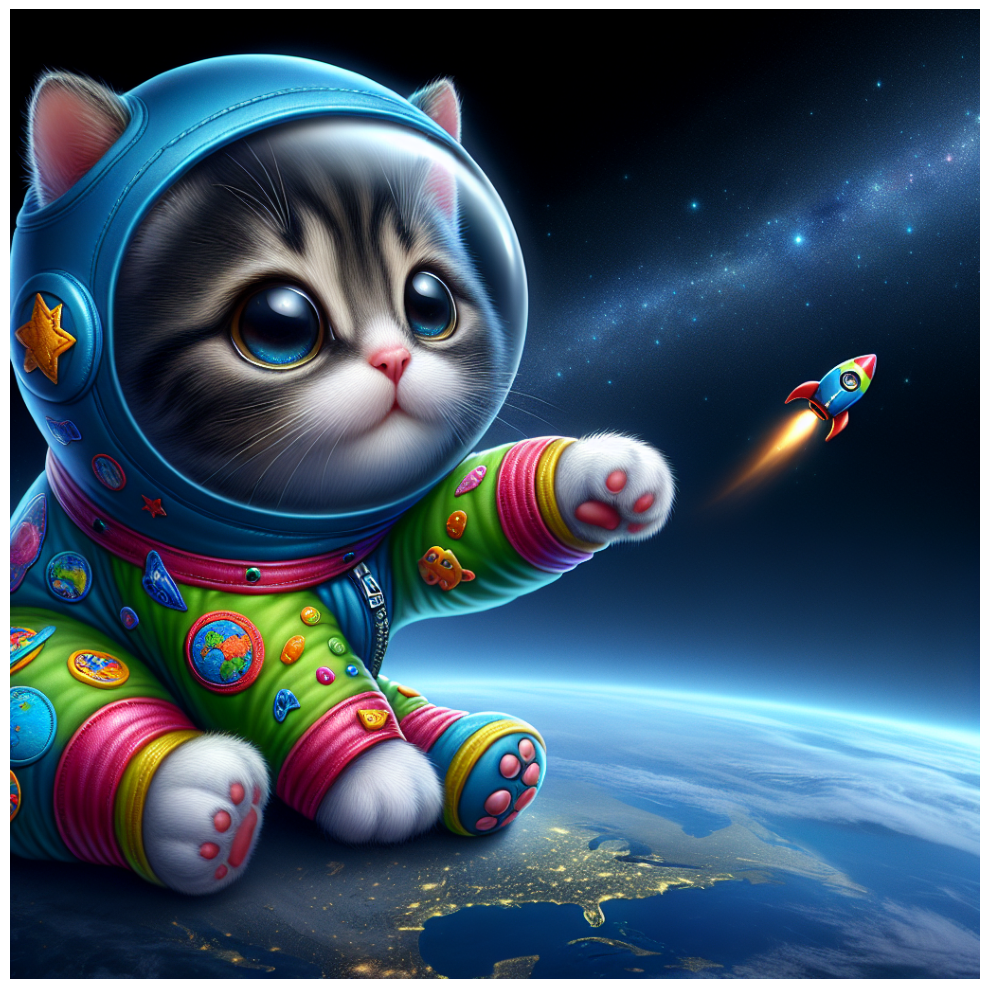

In [17]:
# Display the generated image
display_last_image()

### Example 2: Iterative Refinement (Using Memory)

In [18]:
# Follow-up request - the agent remembers the previous image!
print("🔄 Requesting modification...\n")
result = dalle_agent.invoke(
    {"messages": [{"role": "user", "content": "Now add a spaceship passing by in the background"}]},
    config  # Same session
)

print("\n" + "="*60)
print("Agent Response:")
print("="*60)
print(result['messages'][-1].content)

🔄 Requesting modification...

🎨 Generating image with prompt: An enhanced whimsical scene of a cute cat in a colorful space suit, floating gracefully in the vastn...

Agent Response:
The updated image, now featuring a spaceship passing by in the background, is ready to view! Let me know if there's anything else you'd like to add or modify.


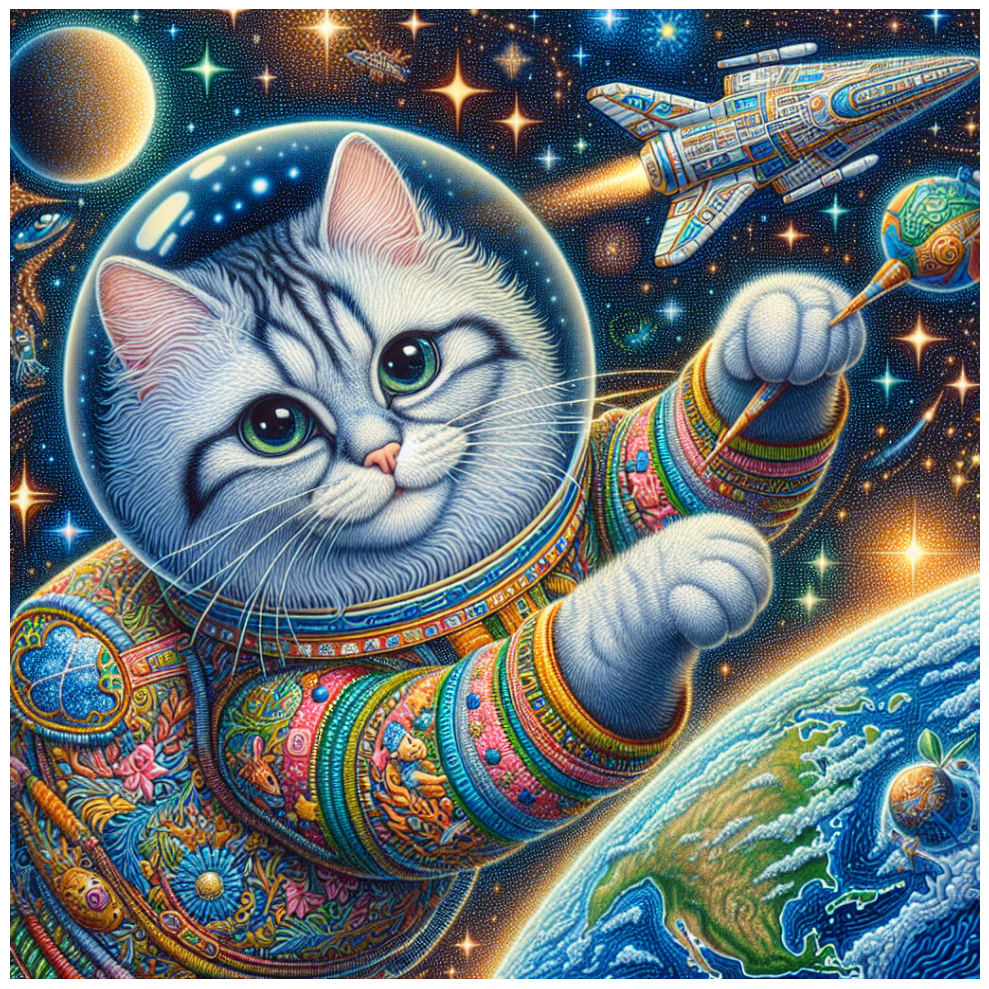

In [19]:
# Display the modified image
display_last_image()

### Example 4: Start a New Image (New Topic)

In [ ]:
# Create a completely different image
print("🎨 Requesting a new image...\n")
result = dalle_agent.invoke(
    {"messages": [{"role": "user", "content": "Create a serene Japanese garden with a koi pond at sunset"}]},
    config
)

print("\n" + "="*60)
print("Agent Response:")
print("="*60)
print(result['messages'][-1].content)

In [ ]:
# Display the new image
display_last_image()

### Example 5: Test Memory - Ask About Previous Images

In [20]:
# Test if the agent remembers what we've created
print("🧠 Testing memory...\n")
result = dalle_agent.invoke(
    {"messages": [{"role": "user", "content": "What images have we created in this session?"}]},
    config
)

print("\n" + "="*60)
print("Agent Response:")
print("="*60)
print(result['messages'][-1].content)

🧠 Testing memory...


Agent Response:
In this session, we have created two images:

1. A whimsical scene of a cute cat in a colorful space suit floating in space with Earth in the background.
2. An enhanced version of the first image, which includes a sleek, futuristic spaceship passing by in the background.

If you'd like to create more images or make further modifications, just let me know!


---
## Your Turn!

Try creating your own images below:

In [ ]:
# Your custom image request
your_prompt = "Create an image of a robot reading a book in a cozy library"  # Change this!

result = dalle_agent.invoke(
    {"messages": [{"role": "user", "content": your_prompt}]},
    config
)

print(result['messages'][-1].content)

In [ ]:
# Display your image
display_last_image()

---
## Summary

**What we built:**
- ✅ LangChain agent with DALL-E 3 integration
- ✅ Conversational memory for iterative refinements
- ✅ Base64 image encoding and display
- ✅ Context-aware image generation

**Key Features:**
- The agent remembers your conversation
- You can iteratively refine images
- Images are displayed directly in the notebook
- The agent enhances your prompts for better results

**Next Steps:**
- Try different image sizes (1024x1024, 1792x1024, 1024x1792)
- Experiment with different quality settings
- Save images to disk
- Build a web interface for the agent

---
**Created with:** LangChain + OpenAI DALL-E 3 + LangGraph